In [14]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [16]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [17]:
coverage_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,2.943654,1.642171,RRT,1.0
1,1.000000,13.245758,1.221098,Tree-Values,1.0
2,1.000000,3.394395,4.109569,RRT,2.0
3,1.000000,6.536016,4.507265,Tree-Values,2.0
4,0.833333,7.714288,30.136928,RRT,5.0
...,...,...,...,...,...
395,1.000000,10.523299,4.550159,Tree-Values,2.0
396,1.000000,6.980445,31.958303,RRT,5.0
397,1.000000,11.392548,34.441251,Tree-Values,5.0
398,1.000000,13.595088,115.219826,RRT,10.0


In [18]:
length_df

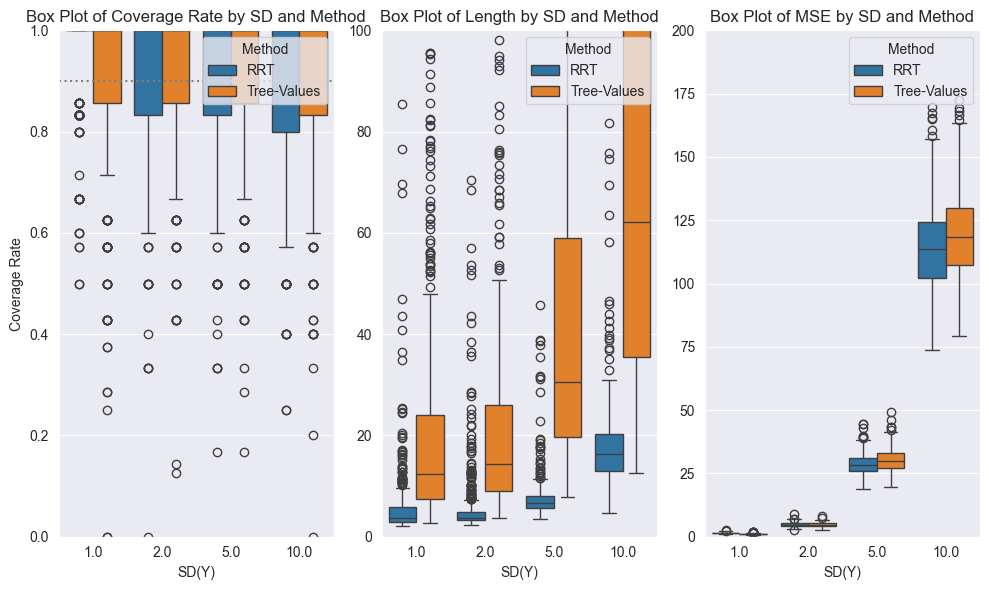

In [19]:
MSE_df

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=False)

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.boxplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,100)
    elif metric == "MSE":
        axes[i].set_ylim(0,200)

# Adjust layout and display
plt.tight_layout()
plt.show()



,SD(Y),Method,Length
0,1.0,RRT,13.066688
1,1.0,Tree-Values,inf
2,2.0,RRT,6.183422
3,2.0,Tree-Values,inf
4,5.0,RRT,9.294935
5,5.0,Tree-Values,73.969960
6,10.0,RRT,19.619035
7,10.0,Tree-Values,inf


In [24]:
# TODO: Case 1 with 1, 5, 10